<div class="alert alert-info" role="alert">
  <h1 class="alert-heading">Introducción a la Química Cuántica</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

<div class="alert alert-info"> 

### **<h3 class="alert-heading">Solución Mecánico-Cuántica de Átomos de Dos Electrones: Átomo Helioide</h3>**

In [1]:
from IPython.display import HTML

### Librerias usadas:

In [2]:
import matplotlib.pylab as plt # Libreria para graficación y visualización
import numpy as np # Librería para manipulación numerica, especialmente para arreglos de datos
import sympy as sp
%matplotlib inline

<div class="alert alert-info">

### **Métodos aproximados: Átomos Polielectrónico**
<p style='text-align: justify;'>
Hemos visto en las dos lecciones anteriores un grupo de problemas para los que se conoce una
solución analítica de la ecuación de Schrödinger. Esta es, sin embargo, una circunstancia excepcional, y la mayoría de problemas reales (naturales) carecen de solución analítica conocida. Por ello, es esencial el estudio de las técnicas que se emplean a luz de la mecánica cuántica para obtener soluciones aproximadas.
    
En segundo lugar, comenzaremos el estudio de los átomos polielectrónicos por medio del examen del átomo de helio. La presencia de los términos de repulsión culombiana entre los electrones
complica notablemente el problema con respecto al caso del átomo hidrogenoide.

<div class="alert alert-info">

### **Métodos de Aproximación Variacional**
<p style='text-align: justify;'>
Sea φ una función normalizada, bien comportada y que cumple las condiciones de contorno del problema (llamada función de prueba). El teorema variacional dice que:

$$\large W = \int\varphi^{\ast}\hat{H}\varphi dq\geq E_0 $$
    
donde $\hat{H}$ es el operador Hamiltoniano del sistema. El valor esperado de $\hat{H}$ para esta función es un límite superior al valor de la energía del estado fundamental, $E_0$.

**Demostración**:
La integral variacional dada por la ecuación de arriba puede escribirse en la siguiente forma:
$$\large \begin{equation}\label{ecu2} \int\varphi^{\ast}\left(\hat{H}-E_0 \right)\varphi dq\geq 0 \end{equation}$$
   
Sea $\varphi=\sum_{i} c_i \psi_i$, siendo ψi funciones propias el operador hamiltoniano $\hat{H}\psi_i=E_i\psi_i$

$$\large \begin{equation} 
    \int\sum_{i}c_{i}^\ast \psi_{i}^\ast\left(\hat{H}-E_{0}\right)\sum_{i}c_{j}\psi_j dq=\sum_{i}c_{i}^{\ast}\sum_{j}c_j\int\psi_{i}^{\ast}\left(\hat{H}-E_0\right)\psi_j dq= \nonumber 
\end{equation}$$

$$\large \begin{equation} 
    \sum_{i}c_{i}^{\ast}\sum_{j}c_j\left[\int\psi_{i}^{\ast}\hat{H}\psi_j dq-\int\psi_{i}^{\ast}E_0 \psi_j dq\right]=\sum\left|c_i\right|^2\left(E_i-E_0\right)\geq0 
\end{equation}$$

$$\large E_i \geq E_0\sum\left|c_i\right|^2$$

Si $E_0$ es la energía del estado fundamental, está claro que $E_0 ≤ E_1 ≤ E_2 ≤ . . . $

**La aplicación inmediata del teorema variacional da lugar a dos tipos de técnicas aproximadas**.

<div class="alert alert-warning">

### **Métodos Aproximación Variacional Simple**
<p style='text-align: justify;'>
se construye una función de prueba que tenga parámetros libres, y se minimiza W con respecto a estos parámetros. Cuanto menor se consiga hacer W más cerca estaremos de $E_0$ y más cerca, se supone, de la verdadera función de onda.

Ej: En el problema del oscilador armónico 1D, podemos tratar de utilizar $ψ=(1+cξ^2)e^{−ξ^{2}}$ como función de prueba, donde $ξ=\sqrt{β}x$, $β = \frac{ωm}{\hbar}$, y $c$ es un parámetro variacional de valor desconocido. Esta función es contínua, derivable, de cuadrado integrable, y se agota asintóticamente en $ξ → ±∞$. Podemos calcular:

$$\large S = \left\langle ψ \mid ψ \right\rangle=\sqrt{\frac{\pi}{2\beta}}\left(1 + \frac{c}{2} + \frac{3c^2}{16}\right)$$

$$\large U = \left\langle ψ \mid H \midψ \right\rangle=\frac{\hbar^2 \beta}{m}\sqrt{\frac{\pi}{2\beta}}\left(\frac{5}{8} - \frac{c}{16} + \frac{43c^2}{128}\right)$$
    
y, minimizando $W = U/S$ con respecto al parámetro variacional:

$$\large \frac{\partial W}{\partial c}=0, \space \space 23c^2 +56c -48 = 0 \space ⇒ \space c={−3.107, 0.6718}$$

De ambas raices, $c = 0.6718$ produce la menor energía $W = 0.517\hbarω$. Este valor aproximado es próximo, aunque mayor, que la energía exacta $E_0 = \frac{1}{2}\hbarω$.

Además de esta técnica sencilla pero trabajosa, el teorema variacional se convierte en una de las principales herramientas de resolución aproximada a través del **método de variaciones lineal**.

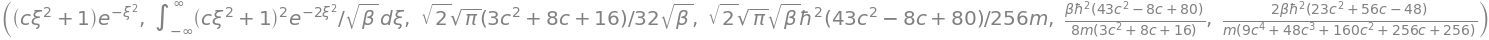

In [4]:
from sympy import *
#from sympy.physics.hydrogen import Psi_nlm, R_nl
init_printing(use_unicode=True)
c, k, beta, hbar, m, omega=symbols('c beta hbar m omega')
var("x ξ")
(x, ξ)
Psi= (1 + c*ξ**2)*sp.exp(-ξ**2)
HP=(-hbar**2/(2*m))*(beta)*(diff(Psi, ξ, 2) - (ξ**2)*Psi)
S=Integral(Psi**2*(1/(sqrt(beta))), (ξ, -oo, oo))
U=Integral(Psi*HP*(1/(sqrt(beta))), (ξ, -oo, oo))
W=(U.doit())/(S.doit())
Wm=diff(W, c)
Sm=S.doit()
Um=U.doit()
Psi, S, Sm.simplify(), Um.simplify(), W.simplify(), Wm.simplify()

In [5]:
Wm1=(2*((m*omega)/(hbar))*hbar**2)*((46*c**2+112*c-96))/((m)*(9*c**4+48*c**3+160*c**2+256*c+256))
op=solve(Wm1, c)
op, op[0].evalf(), op[1].evalf()

In [6]:
W1 = (((((m*omega)/(hbar)))*(hbar**2))*((43/8)*c**2-c+10))/((m)*(3*c**2+8*c+16))

p1=W1.subs(c,op[0]) # Primer punto crítico
p2=W1.subs(c,op[1]) # Segundo punto crítico
beta=(m*omega)/(hbar)
p1.evalf(),p2.evalf()

<div class="alert alert-warning">

### **Métodos Aproximación Variacional Lineal**
<p style='text-align: justify'>
Sean $f_1,f_2,...,f_n$ funciones linealmente independientes. Construimos la función de prueba $φ$ combiando linealmente la $f_i$ funciones.

$$\large \begin{equation}\label{ec1} \varphi=c_1 f_1 + c_2 f_2 +........+c_n f_n =\sum_{j}c_i f_i 
\end{equation}$$

Donde $φ$ es la función variacional de prueba, $c_i$ son parámetros variacionales que deben hacer mínima la integral variacional. $c_i$ y $f_i$ son reales.

Planteamos la integral variacional:

$$\large \begin{equation}\label{ecu2} 
    W=\frac{\int\varphi^{\ast}\hat{H}\varphi dq}{\int\varphi^{\ast}\varphi dq} 
\end{equation}$$
    
Calculamos por separado numerador y denominador de la integral variacional
$$\large \begin{equation}\label{ecu3} 
    \int\varphi^{\ast}\varphi dq=\int\sum_{i}c_{i}^{\ast}f_{i}^{\ast}\sum_{j}c_j f_j dq=\sum_{i}c_{i}^{\ast}\sum_{j}c_{j}\int f_{i}^{\ast}f_j dq=\sum_{i}\sum_{j}c_i c_j S_{ij} 
\end{equation}$$

Donde $S_{ij}$ es la integral de solapamiento.
    
$$\begin{equation}\label{ecu4} 
    \int\varphi^{\ast}\hat{H}\varphi dq=\int\sum_{i}c_{i}^{\ast}f_{i}^{\ast}\hat{H}\sum_{j}c_{j}f_{j}=\sum_{i}\sum_{j}c_{i}^{\ast}c_j\int f_{i}^{\ast}\hat{H}f_j dq=\sum_{i}\sum_{j}c_{i}^{\ast}c_j H_{ij} 
\end{equation}$$

Sustituyendo las ecuaciones (3) y (4) en (2):

$$\large \begin{equation}\label{ecu9} 
    W=\frac{\sum_{i}\sum_{j}c_{i}c_{j}H_{ij}}{\sum_{i}\sum_{j}c_{i}c_{j}S_{ij}} 
\end{equation}$$
    
Vamos a minimizar $W$, para aproximarnos tanto como sea posible a $E_0$. Para ello, derivamos $W$ respecto a los coeficientes $c_k$ de la combinación lineal, e igualamos a cero las derivadas. $\frac{∂W}{∂c_k}=0$ con $k=1,2...n$, da como resultado:
    
$$\large \sum_{i=1}^{n}c_{i}\left(H_{ki}-WS_{ki}\right)=0$$
    
Para una función de prueba con dos funciones base $φ=c_1f_1+c_2f_2$, obtenemos el siguiente sistema:

$$\large \begin{equation} 
	c_1(H_{11}-WS_{11})+c_2(H_{12}-WS_{12})=0\\ 
	c_1(H_{21}-WS_{21})+c_2(H_{22}-WS_{22})=0 
\end{equation}$$
    
Para que el sistema tenga solución única (compatible determinado), el determinante de los coeficientes debe anularse.

$$\large \begin{equation} 
	\left| \begin{array}{cc} 
	H_{11}-WS_{11} & H_{12}-WS_{12}\\ 
	H_{21}-WS_{21} & H_{22}-WS_{22} 
	\end{array} 
	\right|=0 
\end{equation}$$

La resolución del determinante nos da los valores propios de $φ$, es decir, las energías, $W$. A partir de las energías se obtienen los coeficientes variacionales $c_1$ y $c_2$.

<div class="alert alert-success">

### **Método de Aproximación Perturbacional**
<p style='text-align: justify;'>
El segundo método aproximado que vamos a estudiar para resolver la ecuación de Schrödinger, en sistemas de dos electrones, es el método de perturbaciones. Este método compara el sistema sin solución (sistema perturbado), con otro, del que se dispone de solución analítica (sistema sin perturbar). A la diferencia entre ambos Hamiltonianos se le denomina perturbación. Para que el error sea bajo la perturbación debe ser lo más pequeña posible. Es decir, debemos elegir el sistema sin perturbar que tenga un Hamiltoniano lo más similar posible al sistema perturbado.

Sea un Hamiltoniano independiente del tiempo, $\hat{H}$, cuya ecuación, $\hat{H}ϕ_n=E_nψ_n$, no tiene solución analítica (sistema perturbado).

Sea $\hat{H}^0$ el hamiltoniano de un sistema cuya ecuación de Schrödinger, $\hat{H}^{(0)}ϕ^{(0)}_n=E^{(0)}_nψ^{(0)}_n$, sabemos resolver, y es sólo ligeramente diferente de $\hat{H}$ (sistema sin perturbar).

Según el método de perturbaciones, la energía del sistema perturbado viene dada por: $E_n=E^{(0)}_n+E^{(1)}_n$, siendo $E^{(1)}_n$, la corrección de primer orden en la energía.

$$\large \begin{equation} 
	E_n^{(1)}=\int\psi_n^{\ast (0)}\hat{H'}\psi_n^{(0)}dq=\left\langle \psi_n^{(0)}\left|\hat{H'}\right|\psi_n^{(0)}\right\rangle 
\end{equation}$$

Donde, $\hat{H}'$, es la perturbación. $\hat{H}'=\hat{H}−\hat{H}^0$  

La función de onda del sistema perturbado vendrá dada por: $ψ_n=ψ^{(0)}_n+ψ^{(1)}_n$, siendo, $ψ^{(1)}_n$, la corrección de primer orden en la función de onda.
    
$$\large \begin{equation} 
	\psi_m^{(1)}=\sum_{m\neq n}\frac{\int\psi_m^{\ast (0)}\hat{H'}\psi_n^{(0)}dq}{E_m^{(0)}-E_n^{(0)}} 
\end{equation}$$
    
De igual modo que se puede caluclar la corrección de segundo orden para la función de onda y la energía.

$$\large \begin{equation} 
	E_n=E_n^{(0)}+E_n^{(1)}+E_n^{(2)} 
\end{equation}$$

$$\large \begin{equation} 
	\psi_n=\psi_n^{(0)}+\psi_n^{(1)}+\psi_n^{(2)} 
\end{equation}$$
    
Donde, la corrección de segundo orden en la energía, viene dada por:

$$\large \begin{equation} 
	E_n^{(2)}=\int\psi_n^{\ast (0)}\hat{H'}\psi_n^{(1)}dq. 
\end{equation}$$

<div class="alert alert-danger">

### **Tratamiento Perturbacional de átomo de Helio**
<p style='text-align: justify;'>
El helio tiene dos electrones y un núcleo de carga $+2e$. Situaremos el origen de coordenadas en el núcleo, dando coordenadas $(x_1,y_1,z_1)$, $(x_2,y_2,z_2)$ a los electrones $1$ y $2$. Para incluir cualquier ión helioide como $H^-$, $Li^+$, $Be^{+2}$..., tomamos como carga nuclear $+Ze$. Escribimos el Hamiltoniano del Helio bajo la aproximación de masa nuclear infinita $(\frac{m_N}{m_e} → ∞)$ y empleando unidades atómicas.
    
$$\large \begin{equation} \hat{H}=-\frac{\hbar^2}{2m}\nabla_1^2-\frac{\hbar^2}{2m}\nabla_2^2-\frac{Ze^2}{r_1}-\frac{Ze^2}{r_2}+\frac{e^2}{r_{12}} \end{equation}$$

Debido al término $\frac{e^2}{r_{12}}$ la ecuación de Schrödinger no es separable en ningún sistema de coordenadas y debemos utilizar métodos aproximados para resolverla.
Aplicamos la teoría de perturbaciones, eligiendo como sistema sin perturbar el átomo de dos electrones sin interacción interelectrónica, cuyo Hamiltoniano viene dado por:

$$\large \begin{equation} \hat{H}^{0}=-\frac{\hbar^2}{2m}\nabla_1^2-\frac{\hbar^2}{2m}\nabla_2^2-\frac{Ze^2}{r_1}-\frac{Ze^2}{r_2} \end{equation}$$
    
Dado que no existe interacción entre los electrones, estos se comportan como hidrogenoides. La función de onda resultante de resolver la ecuación, $\large \hat{H}^0ψ^{(0)}=E^{(0)}ψ^{0}$, es el resultado de multiplicar las funciones de onda del átomo hidrogenoide para cada electrón, $\large ψ^{(0)}=ψ_1(\vec{r}_1)ψ_2(\vec{r}_2)=|n_1, l_1, m_1(1)\rangle |n_2, l_2, m_2(2)\rangle$ . Para el **estado fundamental** correspondería a:

$$\large \begin{equation} \psi^{(0)}=\frac{1}{\sqrt{\pi}}\left(\frac{Z}{a_0}\right)^{3/2}e^{-Zr_1/a_0}\frac{1}{\sqrt{\pi}}\left(\frac{Z}{a_0}\right)^{3/2}e^{-Zr_2/a_0} \end{equation}$$

Esta función también podemos representarla por: $ψ=1s(1)1s(2)$, siendo $1s(1)=\frac{1}{\sqrt{\pi}}\left(\frac{Z}{a_0}\right)^{3/2}e^{-Zr_1/a_0}$ y $1s(2)=\frac{1}{\sqrt{\pi}}\left(\frac{Z}{a_0}\right)^{3/2}e^{-Zr_2/a_0}$

Por otra parte, la energía del sistema sin perturbar se obtiene como suma de energías de ambos electrones hidrogenoides.

$$\large \begin{equation} E^{(0)}=\frac{-Z^2e^2}{2a_0}+\frac{-Z^2e^2}{2a_0}=\frac{-4e^2}{a_0}=-108.8\;eV \end{equation}$$

Si tenemos en cuenta que el valor experimental de la energía del Helio es $-79 eV$, con esta primera aproximación tenemos un error del 38%, como consecuencia de despreciar el término $\large \frac{e^2}{r_{12}}$.

Ahora pasamos a calcular la perturbación, $\large \hat{H}'=\hat{H}−\hat{H}^0=\frac{e^2}{r_{12}}$, que utilizaremos para obtener la corrección de primer orden en la energía.

$$\large \begin{equation} E^{(1)}=\left\langle \psi^{\ast (0)}\left|\hat{H'}\right|\psi^{(0)}\right\rangle =\frac{5Ze^2}{8a_0}=34\;eV \end{equation}$$

Esta corrección de primer orden nos da una energía para el estado fundamental del átomo de Helio de:

$$\large \begin{equation} E=E^{(0)}+E^{(1)}=-108.8+34=-74\;eV \end{equation}$$

El error cometido desciende al 5.3%.
Aplicando correcciones de segundo y tercer orden se obtiene una energía muy cercana a la experimental
$$\large \begin{equation} E=E^{(0)}+E^{(1)}+E^{(2)}+E^{(3)}=-108.8+34-4.3+0.1=-79\;eV \end{equation}$$
C. W. Scherr y R. E. Knight [Rev. Mod. Phys. 35 (1963) 436] han examinado las correcciones perturbativas hasta orden 13, obteniendo una mejor estimación de −2.90372433 hartree (-78,9813 eV) para la energía del estado fundamental.

<div class="alert alert-success">

### **Tratamiento Variacional de átomo de Helio**
<p style='text-align: justify;'>
Desde 1928 se ha llevado a cabo un extenso trabajo de obtener variacionalmente las mejores estimaciones de la energía del estado fundamental y primeros excitados del helio. Para ello se han utilizado funciones que dependen de $r_1$, $r_2$ y $r_{12}$, y que reciben el nombre de funciones explícitamente correlacionadas.

Vamos, entonces a aplicar el teorema variacional, $W=∫φ^∗\hat{H}φdq≥E_0$, utilizando como función de prueba:

$$\large \begin{equation} \varphi=\frac{1}{\sqrt{\pi}}\zeta^{3/2}e^{-\zeta r_1}\frac{1}{\sqrt{\pi}}\zeta^{3/2}e^{-\zeta r_2}=\phi(1)\phi(2) \end{equation}$$

Esta función de prueba la hemos obtenido a partir de orbitales $1s$ hidrogenoides para ambos electrones, cambiando el número atómico Z por el parámetro variacional $ζ$ (zeta).
La interpretación física de $ζ$ es sencilla, un electrón tiende a apantallar al otro frente al núcleo, cada electrón está sometido a una carga nuclear efectiva menor que la carga nuclear total Z.

El Hamiltoniano para el átomo de Helio, en unidades atómicas, tiene la forma:    

$$\large \begin{equation} \hat{H}=\frac{1}{2}\nabla_1^2-\frac{1}{2}\nabla_2^2-\frac{Z}{r_1}-\frac{Z}{r_2}+\frac{1}{r_{12}} \end{equation}$$

Sustituyendo en la integral variacional:

$$\large \begin{equation} W=\left\langle\varphi\left|\hat{H}\right|\varphi\right\rangle=\left\langle\phi(1)\phi(2)\left|\frac{1}{2}\nabla_1^2-\frac{1}{2}\nabla_2^2-\frac{Z}{r_1}-\frac{Z}{r_2}+\frac{1}{r_{12}}\right|\phi(1)\phi(2)\right\rangle \end{equation}$$

Aplicando la linealidad de la integral y separando en cinco integrales:

$$\begin{eqnarray} W=\underbrace{\left\langle\phi(1)\left|-\frac{1}{2}\nabla_1^2\right|\phi(1)\right\rangle}_{\zeta^2/2} \underbrace{\left\langle \phi(2)|\phi(2)\right\rangle}_{1} + \underbrace{\left\langle\phi(2)\left|-\frac{1}{2}\nabla_2^2\right|\phi(2)\right\rangle}_{\zeta^2/2} \underbrace{\left\langle \phi(1)|\phi(1)\right\rangle}_{1} + \nonumber\\ \underbrace{\left\langle\phi(1)\left|-\frac{-Z}{r_1}\right|\phi(1)\right\rangle}_{-Z\zeta} \underbrace{\left\langle \phi(2)|\phi(2)\right\rangle}_{1} + \underbrace{\left\langle\phi(2)\left|-\frac{-Z}{r_2}\right|\phi(2)\right\rangle}_{-Z\zeta} \underbrace{\left\langle \phi(1)|\phi(1)\right\rangle}_{1}+\nonumber\\ \underbrace{\left\langle\phi(1)\phi(2)\left|-\frac{1}{r_{12}}\right|\phi(1)\phi(2)\right\rangle}_{5\zeta/8} \end{eqnarray}$$

Sumando las diferentes contribuciones a la energía variacional, obtenemos:

$$\large \begin{equation} W=\zeta^2-2Z\zeta+\frac{5\zeta}{8} \end{equation}$$

La energía mínima, $W_{min}$, se obtiene derivando $W$ respecto del parámetro variacional e igualando a cero. De esta forma obtenemos el parámetro óptimo, $(ζ_{opt})$, que sustituido en $W$ da $W_{min}$.

$$\large \begin{equation} \frac{dW}{d\zeta}=0=2\zeta-2Z+5/8 \end{equation}$$

Despejando el parámetro óptimo,

$$\large \begin{equation} \zeta_{op}=Z-5/16 \end{equation}$$

Llevando el parámeto óptimo a la energía variacional, nos da:

$$\large \begin{equation} W_{min}=\left(Z-5/16\right)^2-2Z\left(Z-5/16\right)+5/8\left(Z-5/16\right) \end{equation}$$

Sustituyendo $Z=2$ en la energía, se obtiene un valor (en electrón-voltios) de, $W_{min}=−77eV$, que comparada con el valor experimental de 79 eV nos arroja un error de 1.9%.

**En uno de los primeros trabajos en este campo, Hylleraas utilizó la función de prueba
$\large φ = Ne^{−ζr_1}e^{−ζr_2} (1 + br_{12})$, donde $ζ$ y $b$ son los parámetros variacionales. En 1966 Frankowski y Pekeris [Phys. Rev. 146 (1966) 46] obtuvieron una energía de −2.9037437703 hartree para el estado fundamental, con un error estimado de sólo $10^{−11}$ hartree con respecto a la energía no relativista exacta. Lamentablemente, el uso de funciones explícitamente correlacionadas es muy complejo y difícilmente extensible a átomos polielectrónicos o a moléculas**.

<div class="alert alert-warning">

### **Spín Electrónico**
<p style='text-align: justify;'>
En 1925, buscando una explicación al hecho de que el espectro del Na y otros metales alcalinos consta de pares de líneas de frecuencia muy próxima (dobletes), Uhlenbeck y Goudsmit propusieron que el electr´on posee un momento angular intrínseco adicional al momento
angular orbital. El nombre propuesto para este momento angular, espín (spin) o “giro”, provoca
la imagen del electrón como una esfera cargada girando sobre sí misma. Este modelo clásico, sin embargo, no tiene nada que ver con la realidad intrínsecamente cuántica del fenómeno.
En 1928, Dirac desarrolló la teoría cuántica relativista del electrón, demostrando que el espín aparece como una consecuencia de las simetrías del problema. En la formulación no relativista que estamos utilizando, sin embargo, el espín debe introducirse como una hipótesis adicional.
El espín es un operador de momento angular, $\hat{s}$, con componentes cartesianas $\hat{s}_x$, $\hat{s}_y$, y $\hat{s}_z$. Al igual que ocurre con el momento angular ordinario, las relaciones de conmutación básicas son

$$\begin{equation} 
	[\hat{l}_x,\hat{l}_y]=i\hbar \hat{l}_z\;\;\rightarrow [\hat{s}_x,\hat{s}_y]=i\hbar \hat{s}_z 
\end{equation}$$
$$\begin{equation} 
	[\hat{l}_y,\hat{l}_z]=i\hbar \hat{l}_x\;\;\rightarrow [\hat{s}_y,\hat{s}_z]=i\hbar \hat{s}_x 
\end{equation}$$
$$\begin{equation} 
	[\hat{l}_z,\hat{l}_x]=i\hbar \hat{l}_y\;\;\rightarrow [\hat{s}_z,\hat{s}_x]=i\hbar \hat{s}_y 
\end{equation}$$

También se cumplen las mismas relaciones de conmutación para el cuadrado del momento angular y sus componentes.

$$\begin{equation} 
	[\hat{s}^2,\hat{s}_x]=[\hat{s}^2,\hat{s}_y]=[\hat{s}^2,\hat{s}_z]=0 
\end{equation}$$

Estas últimas relaciones de conmutación nos indican que el momento angular al cuadrado de spin conmuta con sus componentes, existiendo un conjunto completo de funciones propias de ambos operadores. Es decir, si consderamos los operadores $\hat{s}^2$ y $\hat{s}_z$, existe un conjunto completo de funciones popias comunes de ambos. Este conjunto completo de funciones propias está formado por dos miembros, llamados $α$ y $β$. Cualquier estado cuántico de spin viene dado por dichas funciones o por combinaciones lineales de las mismas.

Escribimos las ecuaciones de valores propios para  $\hat{s}^2$ y $\hat{s}_z$ por analogía con las de  $\hat{l}^2$ y $\hat{l}_z$

$$\begin{equation} 
	\hat{s}^2\alpha=\hbar^2s(s+1)\alpha 
\end{equation}$$

donde, $s=0,\frac{1}{2},1,\frac{3}{2},2...$
    
$$\begin{equation} 
	\hat{s}_z\alpha=m_s\hbar\alpha
\end{equation}$$

donde, $m_s=−s, 1 − s, 2 − s, . . . , s − 1, s$

Vemos que, a diferencia de lo que ocurre en el momento angular ordinario, el número cuántico de espín, $s$, puede tomar valores enteros o semienteros. Una partícula elemental dada tiene un valor de $s$ fijado por la naturaleza: (a) para los electrones, quarks, neutrones y protones, $s = \frac{1}{2}$; (b) para los fotones, partículas $Z$ y $W$, $s = 1$; ...

Las ecuaciones de valores propios del espín para el electrón quedaría de la sigueiente forma:
    
$$\begin{eqnarray} 
	\hat{s}^2\alpha & = & 3/4\hbar^2\alpha\\ 
	\hat{s}^2\beta & = & 3/4\hbar^2\beta\\ 
	\hat{s}_z\alpha & = & \frac{1}{2}\hbar\alpha\\ 
  \hat{s}_z\beta & = & \frac{-1}{2}\hbar\beta 
\end{eqnarray}$$

Se usan varios nombres comunes para las funciones $|s, m_s\rangle$ de espín del electrón:
    
$$\large |\frac{1}{2}, +\frac{1}{2}\rangle = |+\frac{1}{2}\rangle = \alpha = |+\rangle = |\uparrow \rangle$$
$$\large |\frac{1}{2}, -\frac{1}{2}\rangle = |-\frac{1}{2}\rangle = \beta = |-\rangle = |\downarrow \rangle$$

Puesto que difieren en valor propio, $α$ y $β$ serán ortogonales, y si elegimos funciones normalizadas: $\langle m_s|m_s'\rangle = δ_{m_s,m_s'}$.

<div class="alert alert-danger">

### **Spín y Átomo Hidrogenoide**
<p style='text-align: justify;'>
Además de las propiedades orbitales, que hemos obtenido en el capítulo anterior, el átomo hidrogenoide posee un espín electrónico. Su función de onda completa es, por tanto, un espinorbital,

$$\large |n, l, m, m_s\rangle = R_{nl}(r)Y_{lm}(\theta, \phi)|m_s\rangle$$
    
caracterizado por los cuatro números cuánticos: principal $(n = 1, 2, ...)$, angular $(l = 0, 1, ...n − 1)$,azimutal $(m = 0,±1, ... ± l)$, y magnético de espín $(m_s = ±\frac{1}{2})$. De los cuatro, sólo $n$ influye en la energía, de modo que cada nivel $E_n = −\frac{Z^2}{2n^2}$ tiene una degeneración $g_n = 2n^2$.
Una notación habitual para referirse a los espinorbitales $|n, l, m,+1/2 \rangle$ y $|n, l, m,−1/2 \rangle$ es $nlm$ y $\overline{nlm}$, respectivamente, donde el número $l$ suele sustituirse por la letra espectroscópica correspondiente $(s, p, d, f, g,$ etc para $l = 0, 1, 2, . . . )$. También es común referirse a $nlm\alpha$ y $nlm\beta$.

<div class="alert alert-success">

### **Spín y Átomo Heliode**
<p style='text-align: justify;'>
Vamos a considerar el átomo de helio desde el punto de vista del spin del electrón y del principio de Pauli. Suponemos que el estado fundamental tiene una función de onda $1s(1)1s(2)$, donde $1s$ representa el orbital hidrogenoide y el número entre paréntesis se refiere al electrón. Para tener en cuenta el spin debemos multiplicar esta función espacial por una función propia de spin.
Veamos las posibles funciones propias de spin:

$$\large \begin{equation} 
	\alpha(1)\alpha(2);\;\;\beta(1)\beta(2);\;\;\alpha(1)\beta(2);\;\;\beta(1)\alpha(2) 
\end{equation}$$

Las dos primeras funciones son simétricas respecto al intercambio de electrones y no distinguen entre ellos, siendo por tanto válidas para construir la función de onda del helio. La tercera y cuarta funciones no son válidas por violar el principio de indistinguibilidad. Además no son simétricas ni antisimétricas frente al intercambio de electrones. Para resolver este problema se construyen combinaciones lineales de la forma:

$$\large \begin{equation} 
	\frac{1}{\sqrt{2}}[\alpha(1)\beta(2)+\beta(1)\alpha(2)]\\ 
	\frac{1}{\sqrt{2}}[\alpha(1)\beta(2)-\beta(1)\alpha(2)] 
\end{equation}$$

La primera de las combinacione es simétrica respecto al intecambio, mientras que la segunda es antisimétrica.

El principio de Pauli exige que la función de onda helioide completa sea antisimétrica frente al
intercambio de ambos electrones. La función orbital $1s(1)1s(2)$ es simétrica frente al intercambio,
de modo que sólo puede combinarse con una función de spín antisimétrica:

$$\large \begin{equation} 
	\psi^{(0)}=1s(1)1s(2)\cdot\frac{1}{\sqrt{2}}[\alpha(1)\beta(2)-\beta(1)\alpha(2)]=\frac{1}{\sqrt{2}} \left| \begin{array}{cc} 1s(1)\alpha(1) & 1s(1)\beta(1)\\ 1s(2)\alpha(2) & 1s(2)\beta(2) \end{array} \right|\end{equation}$$

Veremos que $\psi^{(0)}$ puede utilizarse como función de prueba para obtener de modo aproximado
la energía del estado fundamental. Esta forma de escribir la función de onda recibe el nombre
de determinante de Slater o función determinantal, y se puede generalizar a un sistema de N
electrones.

Consideremos ahora los estados excitados del helio. El de más baja energía, $1s(1)2s(2)$ o $1s(2)2s(1)$, que dan lugar a una función de onda espacial simétrica y otra antisimétrica:

**Simétrica:** $\frac{1}{\sqrt{2}}[1s(1)2s(2)+2s(1)1s(2)] \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space $
**Antisimétrica:** $\frac{1}{\sqrt{2}}[1s(1)2s(2)-2s(1)1s(2)]$
    
Una función orbital simétrica sólo se puede combinar con una función espinorial antisimétrica, y
viceversa. Esto da lugar a cuatro posibilidades, que se pueden describir como combinación de las
cuatro funciones determinantales siguientes:

$$\begin{equation} 
	\frac{1}{\sqrt{2}}[1s(1)2s(2)-2s(1)1s(2)]\alpha(1)\alpha(2) 
\end{equation}$$
$$\begin{equation} 
	\frac{1}{\sqrt{2}}[1s(1)2s(2)-2s(1)1s(2)]\beta(1)\beta(2) 
\end{equation}$$
$$\begin{equation} 
	\frac{1}{\sqrt{2}}[1s(1)2s(2)-2s(1)1s(2)]\frac{1}{\sqrt{2}}[\alpha(1)\beta(2)+\beta(1)\alpha(2)] 
\end{equation}$$

El siguiente nivel de energía se construye con la parte espacial simétrica, multiplicada por la única función de spin antisimétrica.

$$\begin{equation} 
	\frac{1}{\sqrt{2}}[1s(1)2s(2)+2s(1)1s(2)]\frac{1}{\sqrt{2}}[\alpha(1)\beta(2)-\beta(1)\alpha(2)] 
\end{equation}$$

<div class="alert alert-info">

### **Tratamiento Variacional de átomo de Helio (II): La Aproximación Orbital**
<p style='text-align: justify;'>
En la aproximación orbital suponemos que cada electrón se puede describir mediante un
espinorbital, y formamos una función de onda aproximada que sea compatible con el principio de
Pauli, es decir, formamos un determinante de Slater o una combinación de unos pocos determinantes
de Slater fijada por la simetría. La configuración del estado fundamental del helio sería $1s(1)1s(1)$, o $1s^2$ para abreviar. Esta función de onda aproximada será.
    
$$\large \begin{equation} 
	\psi^{(0)}=\overbrace{1s(1)1s(2)}^{\psi_{orb}}\cdot \underbrace{\frac{1}{\sqrt{2}}[\alpha(1)\beta(2)-\beta(1)\alpha(2)]}_{\Sigma}=\frac{1}{\sqrt{2}} \left| \begin{array}{cc} 1s(1)\alpha(1) & 1s(2)\alpha(2)\\ 1s(1)\beta(1) & 1s(2)\beta(2) \end{array} \right|\end{equation}$$

que está normalizada si el orbital $1s$ lo está. Su energía aproximada será:

$$\large \begin{equation} W=\left\langle\psi^{(0)}\left|\hat{H}\right|\psi^{(0)}\right\rangle=\left\langle\psi^{(0)}|\underbrace{-\frac{1}{2}\nabla_1^2-\frac{Z}{r_1}}_{h_1}\underbrace{-\frac{1}{2}\nabla_2^2-\frac{Z}{r_2}}_{h_2}+\frac{1}{r_{12}}|\psi^{(0)}\right\rangle \end{equation}$$    
    
    
    
$$\large \begin{eqnarray} W=\underbrace{\left\langle 1s(1)\left|h_1 \right|1s(1)\right\rangle}_{h_{1s}} \underbrace{\left\langle 1s(2)|1s(2)\right\rangle}_{1}\underbrace{\left\langle \Sigma|\Sigma\right\rangle}_{1} + \underbrace{\left\langle 1s(1)|1s(1)\right\rangle}_{1} \underbrace{\left\langle 1s(2)\left|h_2 \right|1s(2)\right\rangle}_{h_{1s}} \underbrace{\left\langle \Sigma|\Sigma\right\rangle}_{1} + \underbrace{\left\langle 1s(1)1s(2)\left|\frac{1}{r_{12}} \right|1s(1)1s(2)\right\rangle}_{J_{1s, 1s}} \underbrace{\left\langle \Sigma|\Sigma\right\rangle}_{1} = 2h_{1s} + J_{1s,1s} \end{eqnarray}$$    
$J_{1s,1s}$ recibe el nombre de integral culombiana. Para continuar necesitamos dar forma a la función radial del orbital: $1s = R_{1s}(r)Y_{00}(\theta, \varphi)$. La forma más simple es emplear una **función tipo Slater (STO)**, definida por:   
    
$$\large \begin{equation} \text{STO:} \space \space \space \space \chi_{n, \zeta}=N_{n,\zeta}r^{n-1}e^{-\zeta r} \space \space \space \space \text{donde} \space \space \space \space N_{n, \zeta}=\sqrt{\frac{(2\zeta)^{2n+1}}{(2n)!}} \end{equation}$$

Si empleamos un único STO con $n = 1$ para representar la función radial del orbital $1s$ las integrales necesarias son:
$$\left\langle \hat{T} \right\rangle=\left\langle\chi_{1\zeta} \left|-\frac{1}{2}\nabla^2\right|\chi_{1\zeta}\right\rangle= \frac{1}{2}\zeta^2$$
$${\left\langle \hat{V}_{nuc} \right\rangle}_{1s}=\left\langle\chi_{1\zeta} \left|-\frac{Z}{r}\right|\chi_{1\zeta}\right\rangle= -Z\zeta^2, \space \space \space \space J_{1s,1s}=\frac{5}{8}\zeta$$    
Minimizando la energía aproximada:    
$$W=2 \left ({\left\langle \hat{T} \right\rangle}_{1s} + {\left\langle \hat{V}_{nuc} \right\rangle}_{1s} \right) + J_{1s,1s}= \zeta^2 + \left (\frac{5}{8}-2Z \right )\zeta \Rightarrow \frac{dW}{d\zeta}=2\zeta + \left(\frac{5}{8}-2Z \right)=0 \Rightarrow \zeta_{opt}= Z-\frac{5}{16}$$
**En el He**: $\zeta_{opt} = \frac{27}{16}$, $W_{opt} = \frac{−729}{256} = −2.847656$ hartree.

Sin abandonar la aproximación orbital, hay dos estrategias básicas para mejorar este resultado
aumentando la flexibilidad variacional de la función $R_{1s}$:

***Función de Eckart:*** podemos permitir que la función orbital de ambos electrones sea
diferente: $\psi_{orb} =\frac{1}{sqrt{2}} [\chi_{1,\zeta}(1)\chi_{1,\zeta'}(2) + \chi_{1,\zeta'}(1)\chi_{1,\zeta}(2)]$. La solución de mínima energía es: $\zeta = 1.188531$, $\zeta' = 2.183178$, y $W_{opt} = −2.8756613$ hartree. La generalización de este método da lugar a las técnicas conocidas como **Unrestricted Hartree-Fock (UHF)**.

***Método de Hartree-Fock:*** la función radial $R_{1s}(r)$ se puede escribir como una combinaci´on
lineal de tantos **STOs** como se quiera: $R1s(r) =\sum_{k=0}^n \chi_{n_{k},\zeta_{k}}(r)c_{k}$. Los coeficientes $c_k$ óptimos se obtienen resolviendo las ecuaciones de Fock. La selección de los mejores $\zeta_{k}$ es un proceso fuertemente no lineal que se conoce como optimización de la base de cálculo. Por ejemplo, T. Koga y cols. [Phys. Rev. A. 47 (1993) 4510] han publicado la siguiente solución para el He, con energía $E = −2.861680$ hartree:    
    

| $n_k$        | $\zeta_k$                   | $ c_k$                  |
|------------  |-----------------------------|-----------------------  |
| 2            | 6.717358                    | 0.00066288              |
| 1            | 3.290281                    | 0.09610467              |
| 1            | 1.993592                    | 0.23501324              |
| 1            | 1.394235                    | 0.69339797              |

En alusión al número de exponentes orbitales libres por cada par de electrones, éste cálculo se denomina $HF-4\zeta$, mientras que el cálculo que emplea un único **STO** sería $HF-
1\zeta$. Este método se puede extender fácilmente a átomos y moléculas generales, y representa el límite de la aproximación orbital.

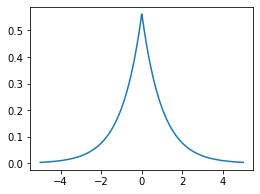

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
#%matplotlib inline # Allows plotting in the notebook

x = np.linspace(-5,5,num=1000)
r = abs(x)

zeta = 1.0

psi_STO = (zeta**3/np.pi)**(0.5)*np.exp(-zeta*r)

plt.figure(figsize=(4,3))
plt.plot(x,psi_STO)

<div class="alert alert-warning">

### **Tratamiento Variacional de átomo de Helio (III): Interacción de configuraciones.**
<p style='text-align: justify;'>
La aproximación orbital es útil para muchos propósitos, pero da lugar a energías y funciones de onda que difieren significativamente de las soluciones exactas. Aún así, existen formas sistemáticas de corregir la solución orbital.
Supongamos que partimos de una colección de espinorbitales ${\psi_a,  \psi_b,  \psi_c, . . . }$, cuyo número, $M$, es mayor que el número de electrones del sistema, $N$. Esto nos permite construir
$\large \binom{M}{N} = \frac{M!}{N!(M-N)!}$ determinantes de Slater diferentes. La función de onda se puede aproximar como combinación lineal de los determinantes, eligiendo los coeficientes de mezcla de modo que hagan mínima la energía. Esta versión del método de variaciones recibe el nombre de interacción de configuraciones completa (full CI). A medida que se añaden más espinorbitales, el método tiende a la solución exacta.


**Ejemplo**: Sean $\large \{a, b, c, d\}$ cuatro espinorbitales del He. Podemos formar $\large \binom{4}{2} = \frac{4!}{2!(4-2)!}=6$ determinantes:
$Φ_1 =\parallel a \space \space b \parallel$, $Φ_2 =\parallel a \space \space c \parallel$, $Φ_3 =\parallel a \space \space d \parallel$, $Φ_4 =\parallel b \space \space c \parallel$, $Φ_5 =\parallel b \space \space d \parallel$, $Φ_6 =\parallel c \space \space d \parallel$, donde hemos empleado la notación     

$$\large \begin{equation} 
\parallel a \space \space b \parallel=\frac{1}{\sqrt{2}} \left| \begin{array}{cc} a(1) & b(1)\\ a(2) & b(2) \end{array} \right|\end{equation}$$


La función de onda **CI** será entonces $\large Φ = \sum_{i=0}^{6} Φ_i c_i$, donde los coeficientes ci son los parámetros variacionales. Las propiedades de simetría y momento angular, como examinaremos en el próximo capítulo, determinan que algunos determinantes se mezclen entre sí y que otros no lo haga.

<center><img src="tabla1.png"></center>
<center>Resumen de algunos cálculos HF, UHF y CI</center>

    

**• El cálculo orbital con base mínima está bastante lejos de la solución exacta. Lamentablemente, abundan los textos de química general o enlace químico, donde ésto se vende como verdad última.**
    
**• Para bases amplias, el cálculo HF mejora sensiblemente. El error en la energía del cálculo HF límite se denomina energía de correlación.**
    
**• La estrategia UHF recupera gran parte del error de correlación con un esfuerzo pequeño.**
    
**• Para que el cálculo CI sea efectivo es importante incorporar funciones de momento angular superior al de los orbitales ocupados en la configuración fundamental: funciones de polarización.**
    
**• Los cálculos CI convergen lentamente hacia la solución exacta. El cociente eficacia/esfuerzo sigue una ley logarítmica.**

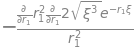

In [7]:
a, n, ξ=symbols('a n ξ')
var("r1 r2 Z")
(r1, r2, Z)
#R_nl(n, l, r, Z)
na=(-1/(r1**2))*(Derivative((r1**2)*(Derivative(R_nl(1, 0, r1, ξ), r1)), r1))
na

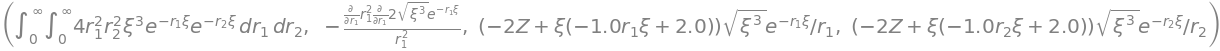

In [8]:
a, n, ξ=symbols('a n ξ')
var("r1 r2 Z")
(r1, r2, Z)
#R_nl(n, l, r, Z)
HP1=(0.5)*(-1/(r1**2))*(diff((r1**2)*(diff(R_nl(1, 0, r1, ξ), r1)), r1))-(Z/(r1))*(R_nl(1, 0, r1, ξ))
HP2=(0.5)*(-1/(r2**2))*(diff((r2**2)*(diff(R_nl(1, 0, r2, ξ), r2)), r2))-(Z/(r2))*(R_nl(1, 0, r2, ξ))
Pr=Integral(R_nl(1, 0, r1, ξ)*R_nl(1, 0, r2, ξ) * r1**2 * r2**2, (r1, 0, oo), (r2, 0, oo))
nabla1=(-1/(r1**2))*(Derivative((r1**2)*(Derivative(R_nl(1, 0, r1, ξ), r1)), r1))
Pr, nabla1, HP1.simplify(), HP2.simplify()

In [9]:
H1=Integral(R_nl(1, 0, r1, ξ)*HP1*r1**2, (r1, 0, oo))
H2=Integral(R_nl(1, 0, r2, ξ)*HP2*r2**2, (r2, 0, oo))
H1.doit(), H2.doit()

⎛⎧                                                           2                
⎜⎪                                               -Z⋅ξ + 0.5⋅ξ                 
⎜⎪                                                                            
⎜⎪                                                                            
⎜⎪∞                                                                           
⎜⎪⌠                                                                           
⎜⎪⎮       ⎛         ____              ⎛            ____                    ___
⎜⎨⎮       ⎜        ╱  3   -r₁⋅ξ       ⎜    2  2   ╱  3   -r₁⋅ξ            ╱  3
⎜⎪⎮     2 ⎜  2⋅Z⋅╲╱  ξ  ⋅ℯ        0.5⋅⎝2⋅r₁ ⋅ξ ⋅╲╱  ξ  ⋅ℯ      - 4⋅r₁⋅ξ⋅╲╱  ξ 
⎜⎪⎮ 2⋅r₁ ⋅⎜- ────────────────── - ────────────────────────────────────────────
⎜⎪⎮       ⎜          r₁                                      2                
⎜⎪⎮       ⎝                                                r₁                 
⎜⎪⌡                                                 

In [10]:
W=0.5*ξ**2 - Z*ξ + 0.5*ξ**2 - Z*ξ + (5/8)*ξ
Wmin=diff(W, ξ)
ξopt=solve(Wmin, ξ)
Wmin, ξopt